In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    #if city not in cities:
        #cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)

631

API Call 
     Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it's being processed (with the city number and city name).

In [31]:
# Create empty lists to hold information needed for scatter plots

city_name= []
temperature=[]
lat= []
long= []
humidity= []
cloudiness= []
wind_speed= []
country= []

In [32]:
# Base Url
url = "http://api.openweathermap.org/data/2.5/weather?"
i= 1
city = city
# Create for loop for cities
for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=imperial"
    # Build response
    response = requests.get(query_url)
    #json
    response_json = response.json()
    response_json
    # Add exception handling with try and except
    try:
        cloudiness.append(response_json["clouds"]["all"])
        temperature.append(response_json["main"]['temp_max'])
        humidity.append(response_json["main"]['humidity'])
        lat.append(response_json["coord"]["lat"])  
        long.append(response_json["coord"]["lon"])
        wind_speed.append(response_json["wind"]["speed"])
        city_name.append(response_json["name"])
        country.append(response_json["sys"]["country"])
        print(f"Record {i}|{city}")
        i+=1
    except (KeyError):
        print("The city could not be located. Continue")

Record 1|lata
Record 2|ponta do sol
Record 3|san patricio
Record 4|leningradskiy
Record 5|ushuaia
Record 6|chuy
Record 7|punta arenas
Record 8|davila
Record 9|winchester
Record 10|champerico
Record 11|hermanus
Record 12|richmond
Record 13|la reforma
Record 14|vaini
Record 15|kaitangata
Record 16|carnarvon
Record 17|albany
The city could not be located. Continue
The city could not be located. Continue
Record 18|raymond
Record 19|panama city
Record 20|viedma
Record 21|puerto ayora
Record 22|bredasdorp
Record 23|atar
Record 24|mataura
Record 25|tual
Record 26|kapoeta
The city could not be located. Continue
Record 27|dargaville
Record 28|acapulco
Record 29|saint-francois
Record 30|yellowknife
The city could not be located. Continue
Record 31|lexington
Record 32|rikitea
Record 33|iquique
Record 34|hobart
Record 35|laguna
The city could not be located. Continue
The city could not be located. Continue
Record 36|nanortalik
Record 37|beringovskiy
Record 38|can tho
Record 39|morro bay
The city c

Record 364|sechura
Record 365|cap malheureux
Record 366|khatanga
Record 367|pirgos
Record 368|cobija
Record 369|iranshahr
Record 370|balod
Record 371|luancheng
Record 372|krasnyy klyuch
Record 373|jacareacanga
Record 374|touros
Record 375|ugoofaaru
Record 376|pevek
Record 377|katherine
Record 378|maraba
Record 379|mabaruma
Record 380|nouadhibou
Record 381|kerema
Record 382|urbana
Record 383|metro
Record 384|groesbeek
Record 385|wasilla
Record 386|nyuksenitsa
Record 387|vondrozo
Record 388|college
Record 389|mananjary
Record 390|fiche
Record 391|banyo
Record 392|ballina
Record 393|prince rupert
Record 394|ascension
Record 395|mahajanga
Record 396|kosonsoy
Record 397|qasigiannguit
Record 398|gboko
Record 399|kimamba
Record 400|sampit
Record 401|oksfjord
Record 402|lagoa formosa
Record 403|cabo san lucas
Record 404|mezhova
Record 405|marsh harbour
Record 406|bull savanna
Record 407|dubovskoye
Record 408|cloquet
Record 409|makinsk
Record 410|sheltozero
Record 411|skjervoy
Record 412|belyy 

Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [34]:
weather_df= pd.DataFrame({
    "City": city_name,
    "Country": country, 
    "Temperature": temperature,
    "Latitude": lat,
    "Longitude": long,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Wind Speed": wind_speed,   
   
})

weather_df= weather_df.rename_axis("City ID")
weather_df.head(21)

,City,Country,Temperature,Latitude,Longitude,Cloudiness,Humidity,Wind Speed
City ID,,,,,,,,
0,Lata,PT,55.20,40.1629,-8.3327,90,82,3.69
1,Ponta do Sol,PT,66.70,32.6667,-17.1000,80,73,7.34
2,San Patricio,US,87.19,28.0170,-97.5169,39,55,23.11
3,Leningradskiy,RU,16.14,69.3833,178.4167,98,95,3.18
4,Ushuaia,AR,44.38,-54.8000,-68.3000,46,61,0.89
5,Chui,UY,74.98,-33.6971,-53.4616,0,34,10.02
6,Punta Arenas,CL,44.71,-53.1500,-70.9167,75,70,3.44
7,Davila,PH,82.36,18.4726,120.5763,3,72,5.32
8,Winchester,GB,59.18,51.0651,-1.3187,0,52,10.36


In [35]:
# Check to make sure all rows are in dataframe
weather_df.count()

City           591
Country        591
Temperature    591
Latitude       591
Longitude      591
Cloudiness     591
Humidity       591
Wind Speed     591
dtype: int64

In [53]:
weather_df.describe()

,Temperature,Latitude,Longitude,Cloudiness,Humidity,Wind Speed
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,62.555262,18.599260,14.653860,60.840948,71.010152,7.849272
std,22.293172,33.344702,90.468691,40.574665,22.118707,5.511775
min,-14.690000,-54.800000,-175.200000,0.000000,1.000000,0.000000
25%,49.090000,-9.227650,-64.021950,17.000000,58.000000,3.830000
50%,68.140000,21.283300,18.944900,75.000000,76.000000,6.460000
75%,80.590000,47.351200,92.858350,100.000000,87.000000,10.795000
max,102.110000,78.218600,179.316700,100.000000,100.000000,38.700000


In [ ]:
#Get the indices of cities that have humidity over 100%
#From describe frame, max value of humidity is 100; do not need to get indices of any cities

Create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

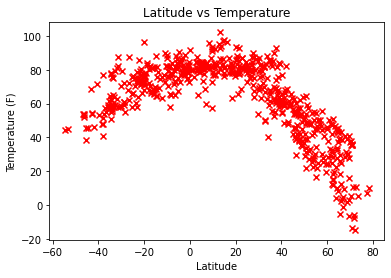

In [50]:
#Temperature vs. Latitude control variable on x-axis
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker= "x", color= "red" )
plt.title( "Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#Save figure
plt.savefig("output_data/figure1.png")
plt.show()

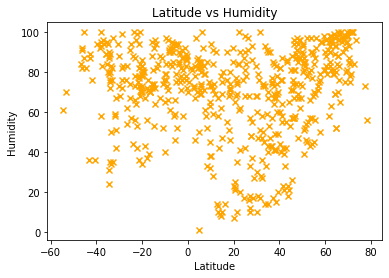

In [49]:
#Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker= "x", color= "orange")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("output_data/figure2.png")
plt.show()

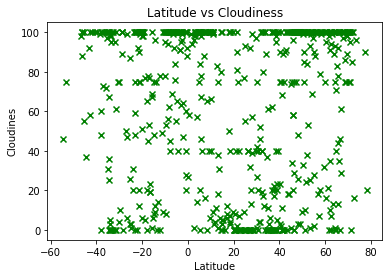

In [51]:
#Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker= "x", color= "green")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudines")

plt.savefig("output_data/figure3.png")
plt.show()

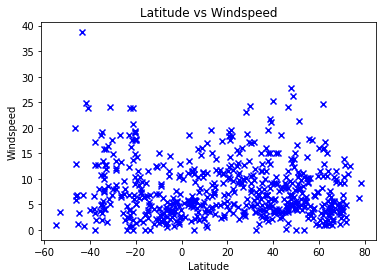

In [52]:
#Latitude vs Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker= "x", color= "blue")
plt.title("Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

plt.savefig("output_data/figure4.png")
plt.show()

Compute the linear regression for each relationship. 
 Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
and Southern Hemisphere (less than 0 degrees latitude)

In [55]:
#Create variables for north and south hemisphere
north_hemisphere= weather_df.loc[weather_df["Latitude"]>=0]
south_hemisphere= weather_df.loc[weather_df["Latitude"]<=0]

The r-value is: -0.8612976734710968


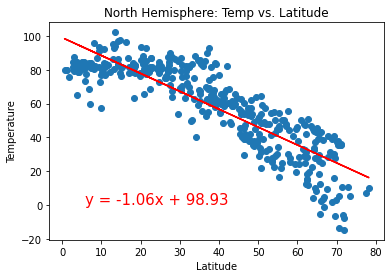

In [81]:
# Add the linear regression equation and line to plot
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("North Hemisphere: Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

There is weak correlation between Northern hemisphere temperatures and latitude

Southern Hemisphere - Temp vs. Latitude Linear Regression

The r-value is: 0.7182826241253636


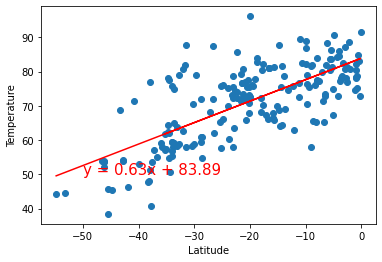

In [82]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_values2 = south_hemisphere['Latitude']
y_values2 = south_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq2,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

There is a strong correlation between southern hemisphere temperatures and latitude

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33402752075526354


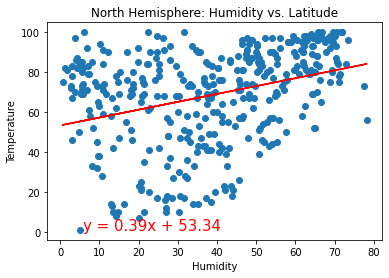

In [65]:
# Add the linear regression equation and line to plot
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("North Hemisphere: Humidity vs. Latitude")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06670470920804569


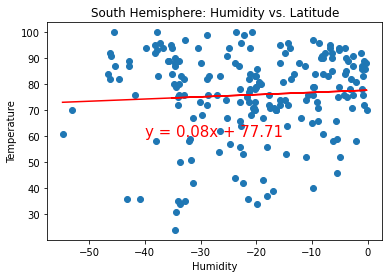

In [68]:
# Add the linear regression equation and line to plot
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.title("South Hemisphere: Humidity vs. Latitude")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18924848126727142


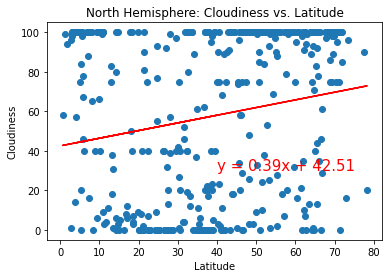

In [71]:
# Add the linear regression equation and line to plot
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title("North Hemisphere: Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08940922301423355


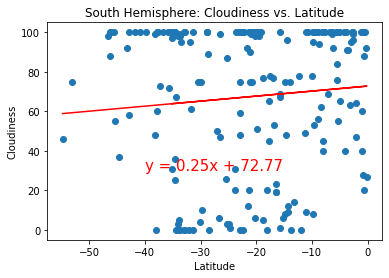

In [73]:
# Add the linear regression equation and line to plot
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.title("South Hemisphere: Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10173894507061483


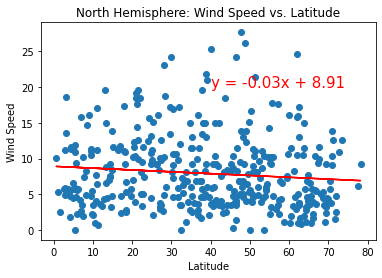

In [77]:
# Add the linear regression equation and line to plot
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("North Hemisphere: Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.28655898275369435


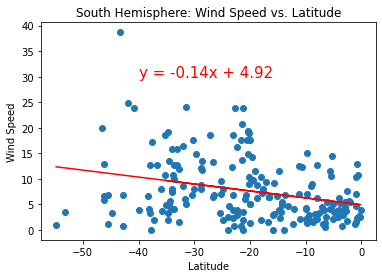

In [80]:
# Add the linear regression equation and line to plot
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.title("South Hemisphere: Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()